## Simple Linear Regression
- In this lab we will use simple linear regression to predict the car price.
- **Objective**
    - To know if the dealer is offering fair value for my trade-in.
    - To know if I put a fair value on my car.

## Dataset
- we will use dataset of Car price prediction hosted on IBM Cloud object.
- [cick here to download](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv)

## Import Package

In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
## Load Dataset
DATAPATH = '/'.join(os.path.abspath('').split('/')[:-4])+'/Data/automobile.csv'

df_auto = pd.read_csv(DATAPATH)
df_auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [22]:
# get features
X = df_auto.drop('price', axis=1)
Y = df_auto['price']

### Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## Simple Linear Regression

**Predict Car price using "highway-mpg"**

In [38]:
# get simple linear independent varibles

X_train_simple = X_train['highway-mpg'].values.reshape(-1, 1)
X_test_simple = X_test['highway-mpg'].values.reshape(-1, 1)

In [40]:
# Fit Simple Linear Regression Model
simple_lm = LinearRegression()
simple_lm.fit(X_train_simple, y_train)

LinearRegression()

In [34]:
# get prediction
y_hat_simple = simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([10530.19044542,  7150.17926639, 12220.19603494, 10530.19044542,
       13910.20162445])

In [35]:
# get intercept
simple_lm.intercept_

39260.285467176436

In [37]:
# get slope
simple_lm.coef_.item()

-845.0027947574554

`Estimated Equation of Best Fit Line is:`   

Price = 39260.28 - 845.0027*highway-mpg

- **Exercise:** 
    - Fit Simple Linear Regression with `engine-size` as independent variable to predict car price
    - Fit Simple Linear Regression with `horsepower` as independent variable to predict car price

## Multiple Linear Regression
- As seen in Simple Linear Regression, we used single independent variable for car price prediction.
- However, in real world datasets, for accurate prediction of car price, we need to consider multiple features/variables instead of single one. In such scenario Multiple Linear Regression would be helpful.

**Predict car price using variables [horsepower, curb-weight, engine-size, highway-mpg]**

In [67]:
# get multiple linear regression independent variables
to_select = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

X_train_mult = X_train[to_select].values
X_test_mult = X_test[to_select].values

In [41]:
# Fit Multile Linear Regression Model
mult_lm = LinearRegression()
mult_lm.fit(X_train_mult, y_train)

LinearRegression()

In [68]:
# get prediction
y_hat_mult = mult_lm.predict(X_test_mult)

In [42]:
# get intercept
mult_lm.intercept_

-11539.108515802094

In [43]:
# get coefficient associated with each independent variables
mult_lm.coef_

array([ 54.23019834,   3.1154028 ,  93.34038826, -18.71070774])

`Estimated equation of best fit line is:`  
Price = -11539.108515802094 + 54.23019834 * horsepower + 3.1154028 * curb-weight + 93.34038826 * engine-size - 18.71070774 * highway-mpg

- **Exercise:** 
    - Fit Multiple Linear Regression with [`engine-size`, `horsepower`] as independent variable to predict car price
    - Fit Multiple Linear Regression with [`normalized-losses`, `highway-mpg`] as independent variable to predict car price

## Model Evaluation Using Visualization
- Now we have we developed our Simple Linear Regression and Multiple Linear Regression model.
- How do we evaluated them?
- We can evaluate our Linear regression either visually or numerically.
- Let's first evaluate our Linear Regression model visually using `Regression Plot` and `Distribution Plot.`

**Regression Plot**  


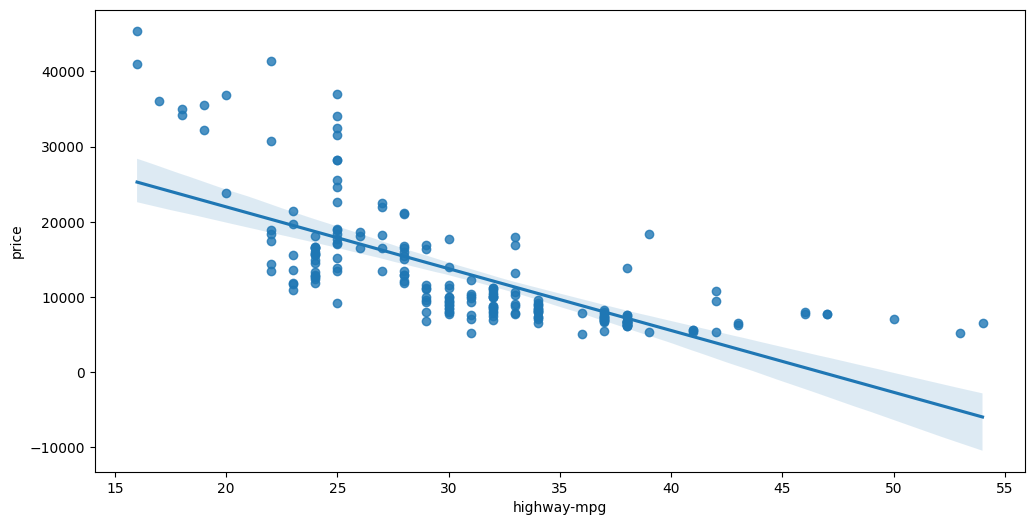

In [50]:
# 1. Simple Linear Regression
plt.figure(figsize=(12, 6))
sns.regplot(x='highway-mpg', y='price', data=df_auto)
plt.show()

- we see slope of the line is negative, which we predicted earlier when fitting simple linear regression line.
- More dispersed is the data point from the regression line, it will be not suitable to model such data point with linear regression.
- Hence, if the data is too far from the line, this linear model might not be the best fit model for this data.
- In above plot, data is not perfectly linear, so simple polynomial regression can do a better Job, since it can capture non linear data.

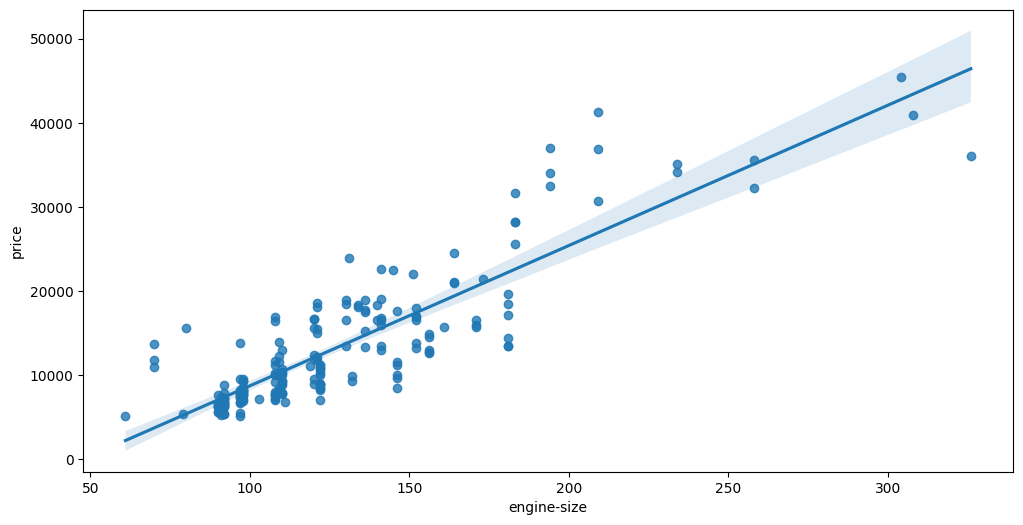

In [51]:
plt.figure(figsize=(12, 6))
sns.regplot(x='engine-size', y='price', data=df_auto)
plt.show()

- This shows that increase in engine size increases the Price of the Car i.e. `positive correlation`

### **Distribution plot**
- We successfully visualize simple linear regression model using Regression plot. it will be complicated for multiple linear regression since there will be multiple independent variables, in such scenarios we could using Distribution plot.
- Now let's visualize our prediction from linear regression model using Distribution plot.

/tmp/ipykernel_117268/3869036504.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label="Actual value")
/tmp/ipykernel_117268/3869036504.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_simple, hist=False, color='b', label="FItte

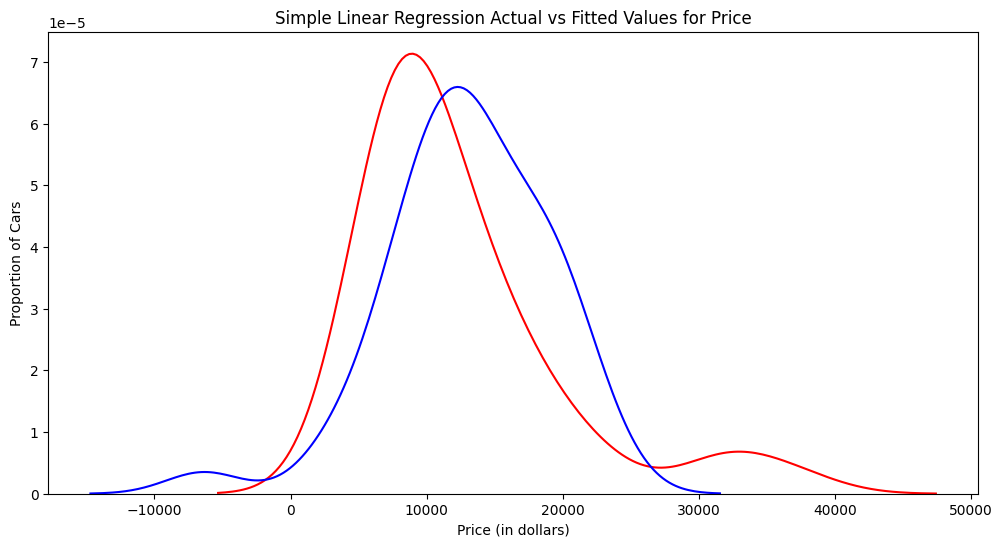

In [64]:
# 1. simple linear regression
plt.figure(figsize=(12, 6))
ax1 = sns.distplot(y_test, hist=False, color='r', label="Actual value")
sns.distplot(y_hat_simple, hist=False, color='b', label="FItted values", ax=ax1)

plt.title('Simple Linear Regression Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

/tmp/ipykernel_117268/821227746.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label="Actual value")
/tmp/ipykernel_117268/821227746.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_mult, hist=False, color='b', label="FItted va

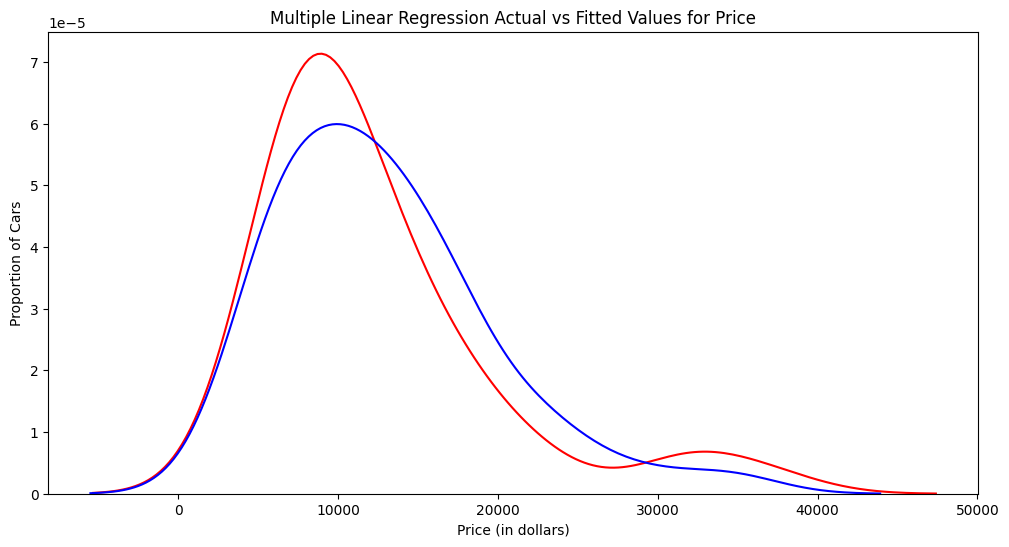

In [69]:
# 1. multiple linear regression
plt.figure(figsize=(12, 6))
ax1 = sns.distplot(y_test, hist=False, color='r', label="Actual value")
sns.distplot(y_hat_mult, hist=False, color='b', label="FItted values", ax=ax1)

plt.title('Multiple Linear Regression Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

- From above 2 Distributions plot, we can say that,
    - Modeling using multiple linear regression is far better than compared to simple linear regression.
    - This is because overlapping area of Distribution plot between actual and predicted values is higher incase of Multiple Linear Regression compared to Single Linear Regression.

### **Regression Evaluation Metrics**  
 - `MAE` 
    - When comparing model, models with smallest MAE value is better.
 - `MSE`  
    - When comparing model, models with smallest MSE value is better.
 - `RMSE`
    - When comparing model, models with smallest RMSE value is better.
- `R^2`
   - When comparing model, models with highest R^2 value is better.

**Simple Linear Regression**

In [71]:
# Mean Absolute Error
print("Mean Absolute Error of Simple Linear Regression model is: ", mean_absolute_error(y_test, y_hat_simple))

Mean Absolute Error of Simple Linear Regression is:  4204.069931620724


In [72]:
# Mean Squared Error
print("Mean Squared Error of Simple Linear Regression model is: ", mean_squared_error(y_test, y_hat_simple))

Mean Squared Error of Simple Linear Regression model is:  29430822.338660154


In [77]:
#R^2
print("R^2 of Simple Linear Regression model is: ", r2_score(y_test, y_hat_simple))

R^2 of Simple Linear Regression model is:  0.4446574660079585


**Multiple Linear Regression**

In [78]:
# Mean Absolute Error
print("Mean Absolute Error of Multiple Linear Regression model is: ", mean_absolute_error(y_test, y_hat_mult))

Mean Absolute Error of Multiple Linear Regression model is:  2737.0634011548564


In [79]:
# Mean Squared Error
print("Mean Absolute Error of Multiple Linear Regression model is: ", mean_squared_error(y_test, y_hat_mult))

Mean Absolute Error of Multiple Linear Regression model is:  13623765.520788323


In [80]:
#R^2
print("R^2 of Multiple Linear Regression model is: ", r2_score(y_test, y_hat_mult))

R^2 of Multiple Linear Regression model is:  0.7429274527307541


### Decision
- It's not always true that increasing number of independent variables always improves the model.
- But in our scenario, considering R^2 and mean squared error, we came to conclusion that multiple linear regression is better at predicting car price as compared to single linear regression.
- Also, depending on the data nature, we may need to extend to polynomial regression as well. This is the case when our data samples are non linear.